In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../dataset/2021.01.01.csv")
df1 = pd.read_csv("../../dataset/2022.06.12.csv")

col = df.columns
df

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,2716.142857,969,10051,786,9200,3.093910,7,7,6,786,56328,160946769170627,1609467672690358,34094.88700,benign,19.015911
1,1901.400000,967,23531,786,9200,1.642038,10,7,6,786,56324,1609467691706011,1609467672689065,40226.65200,benign,19.016947
2,907.312500,754,32742,786,9092,1.111004,32,20,6,786,57148,1609467701725488,1609467672683006,37214.20000,benign,29.042482
3,549.842105,588,13833,786,9300,2.344926,57,34,6,786,56998,1609467713462009,1609467682094405,33816.18400,benign,31.367603
4,4288.714286,0,224,15169,53,3.326140,7,0,17,786,46151,1609467715620521,1609467685597113,745.05536,benign,30.023409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43773,728.090909,721,52541,786,9200,0.791238,11,6,6,786,56318,160954557746121,1609545569450156,42142.94500,benign,8.011054
43774,2.000000,326,10147,786,9200,2.675070,4,2,6,786,56324,160954556945598,1609545569447221,28016.00400,benign,0.008759
43775,0.000000,0,0,15169,53,0.000000,4,0,6,786,50018,1609545585432444,1609545578304481,0.00000,benign,7.127963
43776,0.500000,457,1370,786,9300,5.862206,2,1,6,786,59370,1609545586890016,1609545586888719,10710.24900,benign,0.001297


In [3]:
df1

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,0.0,0,0,786,31306.0,0.000000,1,0,6,786,47613.0,1655074782132491,1655074782132491,0.000000,outlier,0.000000
1,0.0,0,0,786,24298.0,0.000000,1,0,6,786,47613.0,1655074782573321,1655074782573321,0.000000,outlier,0.000000
2,0.0,0,0,786,31789.0,0.000000,1,0,6,786,47613.0,1655074783148517,1655074783148517,0.000000,outlier,0.000000
3,0.0,0,0,786,29409.0,0.000000,1,0,6,786,47613.0,1655074783149855,1655074783149855,0.000000,outlier,0.000000
4,0.0,0,0,786,60965.0,0.000000,1,0,6,786,47613.0,1655074783167254,1655074783167254,0.000000,outlier,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26162,0.0,0,0,786,554.0,0.000000,2,1,6,786,8492.0,1655078343916062,1655078343822522,0.000000,outlier,0.093540
26163,0.0,8,8,786,NaN,3.000000,1,1,1,786,NaN,1655078338259086,1655078338258995,47.999996,outlier,0.000091
26164,0.0,8,8,786,NaN,3.000000,1,1,1,786,NaN,165507834136686,165507834136681,47.999996,outlier,0.000050
26165,93.0,0,23,786,554.0,3.914866,4,3,6,786,49872.0,1655078344174555,1655078343989254,90.041930,outlier,0.185301


In [4]:
df1.drop(df1[df1['label'] == 'malicious'].index, inplace=True)
df1.shape

(22419, 16)

In [5]:
dfa = np.concatenate((df, df1), axis=0)

In [6]:
dfa.shape

(66197, 16)

In [7]:
dfa = pd.DataFrame(dfa, columns=col)

dfa

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,2716.142857,969,10051,786,9200,3.09391,7,7,6,786,56328,160946769170627,1609467672690358,34094.887,benign,19.015911
1,1901.4,967,23531,786,9200,1.642038,10,7,6,786,56324,1609467691706011,1609467672689065,40226.652,benign,19.016947
2,907.3125,754,32742,786,9092,1.111004,32,20,6,786,57148,1609467701725488,1609467672683006,37214.2,benign,29.042482
3,549.842105,588,13833,786,9300,2.344926,57,34,6,786,56998,1609467713462009,1609467682094405,33816.184,benign,31.367603
4,4288.714286,0,224,15169,53,3.32614,7,0,17,786,46151,1609467715620521,1609467685597113,745.05536,benign,30.023409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66192,0.0,0,0,786,554.0,0.0,2,1,6,786,8492.0,1655078343916062,1655078343822522,0.0,outlier,0.09354
66193,0.0,8,8,786,NaN,3.0,1,1,1,786,NaN,1655078338259086,1655078338258995,47.999996,outlier,0.000091
66194,0.0,8,8,786,NaN,3.0,1,1,1,786,NaN,165507834136686,165507834136681,47.999996,outlier,0.00005
66195,93.0,0,23,786,554.0,3.914866,4,3,6,786,49872.0,1655078344174555,1655078343989254,90.04193,outlier,0.185301


In [8]:
LABELS = ['benign', 'outlier']

([<matplotlib.axis.XTick at 0x7fb9c99f1820>,
 [Text(0, 0, 'benign'), Text(1, 0, 'outlier')])

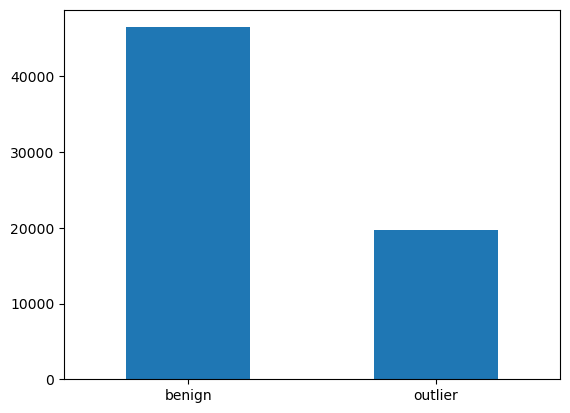

In [9]:
count_classes_all = pd.value_counts(dfa['label'], sort=True)
count_classes_all.plot(kind='bar', rot=0)
plt.xticks(range(2), LABELS)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

y = dfa['label']
X = dfa.drop(['label'], axis=1)

ohe = OneHotEncoder(sparse=False)
ohe.fit(dfa['label'])
y = ohe.transform(dfa['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(y_train)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

/Users/kimtaeyoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=['benign' 'benign' 'benign' ... 'outlier' 'outlier' 'outlier'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y_train_over).value_counts())

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(X_train_over.shape))